# 0. 패키지 불러오기 

In [26]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz : 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (dot.확자아 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 분류 Random Forest 
from sklearn.ensemble import RandomForestClassifier 

# 최적 모델, 파라미터 탐색 
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 나무 시각화 페이지

# os환경
import os

# PATH 설정:graphviz 설치된 경로 지정
os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# 1. 데이터

### 1-1. 데이터 구성하기 

In [28]:
df_raw=pd.read_csv("/home/piai/Downloads/3/HMEQ.csv", engine='python')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


### 1-2. 데이터 전처리 - 결측치 처리

In [29]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [30]:
df_raw.fillna(df_raw.mean(), inplace=True)

In [37]:
df_raw["JOB"].fillna("Other", inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

### 1-3. 데이터 구성하기 - 더미변수 생성

In [38]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


### 1-4. 데이터 구성하기 - 데이터 분할

In [39]:
# 설명변수, 목표변수 데이터 지정 
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)
df_raw_y=df_raw_dummy["BAD"]

In [40]:
# train, test 데이터를 7:3 비율로 분할한다. 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [41]:
# 데이터 분할 
df_train,df_test=train_test_split(df_raw_dummy, test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))

train data size:(2623, 19)
test data size:(1125, 19)


# 2. 모델 생성 

### 2-1 모델 생성

In [42]:
# 랜덤 포레스트 생성 : RandomForestClassifer
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.946


### 2-2 생성된 랜덤 포레스트 모델의 옵션 확인

In [43]:
rf_uncustomized

RandomForestClassifier(random_state=1234)

### 2-3 모델 파라미터 조정 : 트리수 변경에 따른 모델 성능 

In [44]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# n_estimators: 트리 수 변경: 1~150 
para_n_tree=[n_tree*10 for n_tree in range(1,16)] # 참조 : para_split:[10,20,30,...,150]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(random_state=1234,n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_n=pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


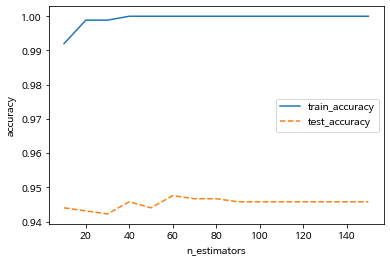

In [45]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree,train_accuracy,linestyle='-',label='train_accuracy')
plt.plot(para_n_tree,test_accuracy,linestyle='--',label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

#### Train/test 데이터의 성능 변화를 고려하여 40, 60이 선택지가 될 수 있는데, 이번에는 40을 선택하기로 한다. 

### 2-4 모델 파라미터 조정 : 트리수 변경에 따른 모델 oob error 변화

In [53]:
# error 저장 리스트 
oob_error=[]

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This prob

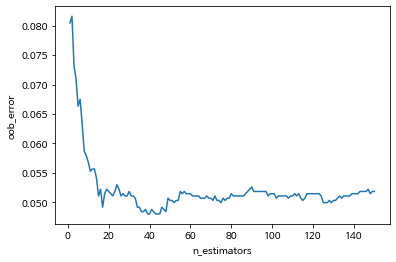

In [55]:
# 그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel("oob_error")
plt.xlabel("n_estimators")
# 트리 수 지정 
n_estimators=100

#### 생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가한다(OOB Error 감소). 모델의 특성을 고려하였을 때, 100을 선택할 수 있지만, 이번에는 40을 선택하기로 한다.  

### 2-5 모델 파라미터 조정 : 최대 깊이 변경에 따른 모델 성능 

In [58]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# max_depth: 최대 깊이 변경
para_depth=[depth for depth in range(1,11)] # 참조 : para_depth:[1,2,3,...,10]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(random_state=1234,n_estimators=100, max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depthdepth']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,Depthdepth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.938,0.931
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.949,0.936
8,9,0.951,0.935
9,10,0.956,0.938


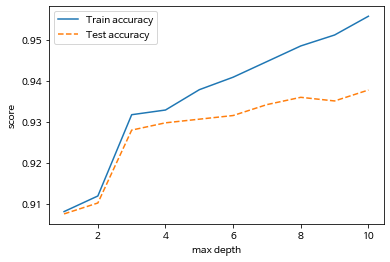

In [60]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

#### 최대 깊이 증가에 따라 모델의 정확도는 증가하며 train/test 데이터의 성능 변화를 고려하여 4를 선택한다. 

### 2-5 모델 파라미터 조정 : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [65]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수 
para_split=[n_split*10 for n_split in range(1,11)] # 참조 : para_split:[1,2,3,...,10]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(random_state=1234,n_estimators=100, max_depth=4 \
                              ,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesSplit']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,1,0.933,0.929
1,2,0.933,0.929
2,3,0.932,0.929
3,4,0.933,0.929
4,5,0.932,0.929
5,6,0.932,0.929
6,7,0.932,0.929
7,8,0.932,0.928
8,9,0.932,0.928
9,10,0.932,0.928


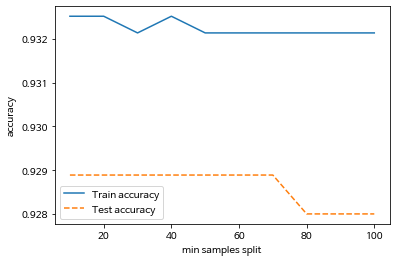

In [66]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples split')
plt.legend()

#### 분리 노드의 최소  자료 수 증가에 따라 모델의 정확도는 감소하나 test 데이터의 성능 변화를 고려하면 70까지는 영향이 없으며, 80은 자료 수가 커서 특정 값을 지정하지 않음 (if 분리 노드가 의미가 있으면 넣는다.) 

### 2-5 모델 파라미터 조정 : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [67]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수 
para_leaf=[n_leaf*10 for n_leaf in range(1,11)] # 참조 : para_leaf:[1,2,3,...,10]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(random_state=1234,n_estimators=100, max_depth=4 \
                              ,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesSplit']= para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_depth.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,1,0.930,0.928
1,2,0.927,0.925
2,3,0.927,0.924
3,4,0.920,0.916
4,5,0.908,0.908
5,6,0.908,0.908
6,7,0.908,0.908
7,8,0.908,0.908
8,9,0.908,0.908
9,10,0.908,0.908


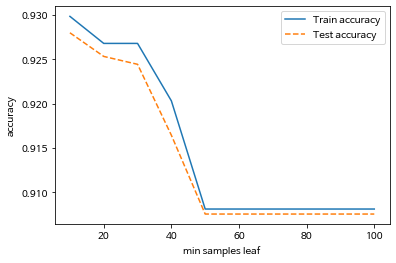

In [68]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples leaf')
plt.legend()

#### 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며, Train/test 데이터의 성능 변화를 고려하여 20을 선택한다 .

### 2-5 모델 파라미터 조정 : GirdSearchCV를 이용한 최적 parameter 찾기

In [79]:
# 모듈 추가 : 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [80]:
estimator=RandomForestClassifier(random_state=1234,n_estimators=100)

# 구하고자 하는 parameter와 범위
param_grid={'max_depth':para_depth,'min_samples_leaf':para_leaf}

# 설명력이 높은 최적 parameter 찾기
grid_rf=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_rf.fit(df_test_x,df_test_y)

print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_rf.best_params_))
print('\nbest score:\n{}'.format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=1234)

best parameter:
{'max_depth': 5, 'min_samples_leaf': 10}

best score:
0.929


#### GridSearchCV를 이용하였을 때 최대 깊이는 5, 최소 잎사귀 갯수는 10개로 나왔다. 

# 3. 결론 도출

### 3-1 최종 모델 선택

In [76]:
# 최종 모델 
rf_final=RandomForestClassifier(random_state=1234,n_estimators=100, max_depth=4 \
                              ,min_samples_leaf=20)
rf_final.fit(df_train_x,df_train_y)

# 평가 
y_pred=rf_final.predict(df_test_x)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(rf_final.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(rf_final.score(df_test_x,df_test_y)))

# Confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))


Accuracy on training set:0.927
Accuracy on test set:0.925
Confusion matrix:
[[1021    0]
 [  84   20]]


#### train/test 데이터의 정분류율이 비슷한 수준으로 안정적인 모델임을 확인할 수 있다. 하지만 Confusion matrix에서 84개의 1을 0으로 판단할 것을 고려한다면 정확도 개선이 필요하다고 생각된다. 

### 3-2 feature_importances_ : 설명 중요도 

In [82]:
# 변수명
v_feature_name=df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.475
5,DELINQ,0.175
4,DEROG,0.066
6,CLAGE,0.061
7,NINQ,0.058
8,CLNO,0.051
0,LOAN,0.039
2,VALUE,0.027
3,YOJ,0.014
1,MORTDUE,0.013


Text(0, 0.5, '변수')

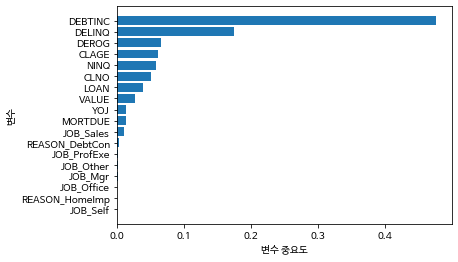

In [83]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#### 트리 생성 시 부채 비율(DEBTINC), 연체된 신용 한도의 수(DELINQ) 순으로 영향도가 큰 순으로 해석할 수 있다. 단, 계산된 변수 중요도 값이 낮거나 0이라도 선택되는 훈려 데이터에 따라 중요도가 변경될 수 있다. 